# Sea Ice Concentration from AMSR

## Dataset resources

The data of the operational seaice concentration product can be downloaded via the link given below.

**Authors** Spreen, G., L. Kaleschke, and G.Heygster

**Year** 2018

**Institute** Institute of Environmental Physics, University of Bremen

**URL** https://seaice.uni-bremen.de (https://data.seaice.uni-bremen.de/amsr2/asi_daygrid_swath/n6250/2018/oct/Arctic/)

**Citeable Publication** Spreen, G., L. Kaleschke, and G.Heygster (2008), Sea ice remote sensing using AMSR-E 89 GHz channels J. Geophys. Res.,vol. 113, C02S03, https://doi.org/10.1029/2005JC003384

## Information about this notebook

This example script was provided as part of the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author: Matthias Buschmann, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, m_buschmann@iup.physik.uni-bremen.de

Github repository: https://github.com/ac3-tr/ac3-notebooks

**Setup instructions for a reference Python Environment can be found on the [Github page](https://github.com/ac3-tr/ac3-notebooks)**

## Reading example dataset

An .hdf-file providing the arctic seaice concentration of an arbitrary day (here 2018-10-29) was downloaded and saved in the working directory of this notebook. The .hdf file is opened using the pyhdf (or python-hdf4) module and the concentration values read into memory.

In [2]:
import matplotlib.pyplot as plt
import numpy.ma as ma
import cartopy.crs as ccrs
import cartopy
import pyhdf.SD as SD

%matplotlib inline

In [5]:
data = SD.SD('../data/asi-AMSR2-n6250-20181029-v5.hdf')
#print(data2.datasets())
asi = data.select('ASI Ice Concentration')
concentration = asi.get()
concentration = ma.masked_less(concentration, 1)
data.end()

## Plotting the dataset

Using the Cartopy module, the seaice concentration can be plotted onto a map. Using Cartopy's coordinate reference system module, a North-Polar-Stereographic projection is created and ocean and land masks read in from the built-in Natural Earth API.

The extent of the data array is set to match the [NSIDC projection convention](https://nsidc.org/ease/clone-ease-grid-projection-gt).

In [6]:
crs = ccrs.NorthPolarStereo(central_longitude=-45,true_scale_latitude=70)

land110m = cartopy.feature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='None', facecolor='k')
ocean110m = cartopy.feature.NaturalEarthFeature('physical', 'ocean', '110m', edgecolor='None', facecolor='lightgray')


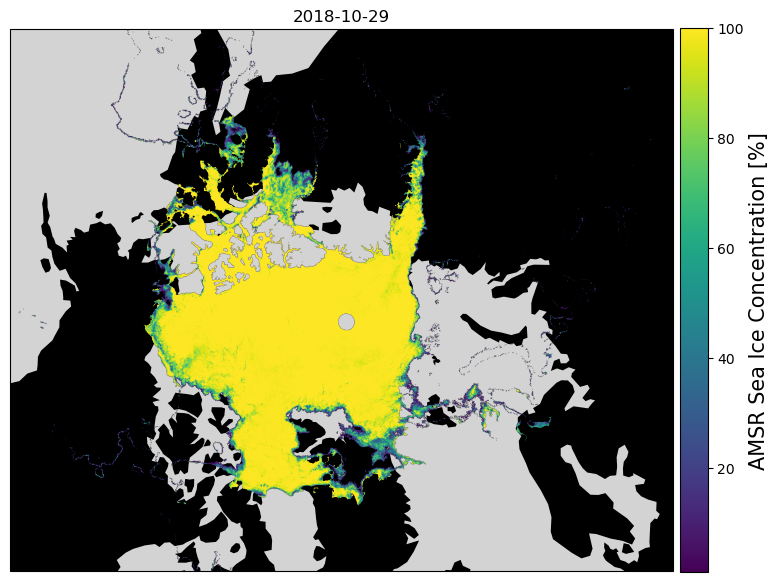

In [20]:
fig = plt.figure(figsize=(9, 16))
ax = fig.add_subplot(111, projection=crs)
ax.set_title('2018-10-29')
ax.add_feature(ocean110m)
ax.add_feature(land110m)
ax.set_extent([-3850000,3750000,-2350000,3850000],crs=crs)
im = ax.imshow(concentration, extent=[-3850000,3750000,-5350000,5850000], zorder=30)
cb = fig.colorbar(im, ax=ax, fraction=0.039, pad=0.01)
cb.set_label('AMSR Sea Ice Concentration [%]', fontsize=15)